# Machine Learning course (openedu)

Week 1

In [145]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

##  Exploring data and get need values

In [146]:
#читаем файл
all_stars = pd.read_csv('stars.csv')

#берем 2 нужных DF
stars = all_stars[(all_stars.TARGET == 0) & (all_stars.MIP <= 104.5859375) & (all_stars.MIP >= 104.1953125) |
(all_stars.TARGET == 1) & (all_stars.MIP <= 115.3515625) & (all_stars.MIP >= 101.9609375)]
#сшиваем их
stars= pd.concat([need_stars1, need_stars2], ignore_index=True)
#сортируем
stars = stars.sort_values('MIP', ascending=True)

## Get MIP statistics 

In [147]:
#получение информации о DF по столбцу MIP
stars.describe()['MIP']

count    203.000000
mean     106.454703
std        3.431455
min      101.960938
25%      104.316406
50%      104.531250
75%      108.207031
max      115.351562
Name: MIP, dtype: float64

## Lin normalize 

In [148]:
#Удаление столбца target
stars = stars.drop(['TARGET'], axis = 1)
#Линейная нормировка
scaler = preprocessing.MinMaxScaler()
names = stars.columns
d = scaler.fit_transform(stars)
#нормированный DF
scaled_stars = pd.DataFrame(d, columns=names)

In [149]:
#Описание нормированного DF
scaled_stars.describe()['MIP']

count    203.000000
mean       0.335590
std        0.256258
min        0.000000
25%        0.175904
50%        0.191949
75%        0.466453
max        1.000000
Name: MIP, dtype: float64

## Distance function

In [150]:
STAR = np.array([0.157, 0.311, 0.676, 0.586, 0.307, 0.848, 0.673, 0.64])
#функция расчета Евклидовой метрики для массивов
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2, axis=1))   

#получение массивов растояний
distance = distance(STAR, scaled_stars.values)
print(min(distance))

0.9109222479727225


[ 15.09236103  31.5701635  -18.31412263 -10.90203336   0.95085657
   0.5817857   -1.57639826   0.19030584   0.82419667   0.54194379]


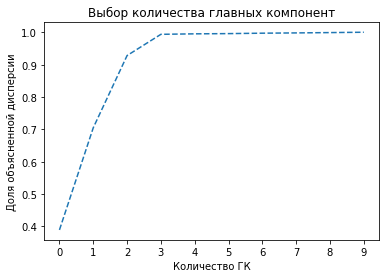

In [153]:
df = pd.read_csv('МГК.csv')
data = df.values

#центрируем матрицу
Y = data - data.mean(axis=0, keepdims=True)

#ковариционная матрица
covmat = np.dot(np.transpose(Y), Y)/60

#массивы собственных чисел и векторов
_, f = np.linalg.eig(covmat)

#первая столбец матрицы, а именно первый вектор весов
f1 = f[:,0]

#матрица новых координат 60-и объектов
preZ = np.dot(Y,f)

#координаты 1го объекта относительно всех главных компонент
print (preZ[0])

#Автоматическая функция МГК
from sklearn.decomposition import PCA
# Допустим, компоненты = 2

pca = PCA(n_components = 2)

pca.fit(data)
x_pca = pca.transform(data)
#print(x_pca)

#plt.figure(figsize =(6, 6))
#plt.scatter(x_pca[:, 0], x_pca[:, 1],  cmap ='plasma')  
# маркировка осей X и Y
#plt.xlabel('First Principal Component')
#plt.ylabel('Second Principal Component')

#создание массива объясненных дисперсий
dispArray = []
for i in range(1, len(_)+1):
    disp = sum(_[0:i])/sum(_[:])
    dispArray = np.append(dispArray, disp)

plt.title('Выбор количества главных компонент')  
plt.xlabel('Количество ГК')
plt.ylabel('Доля объясненной дисперсии')
plt.xticks(np.arange(0,11, step = 1))
plt.yticks(np.arange(0, 10, step = 0.1))
plt.plot(dispArray, ls = '--')


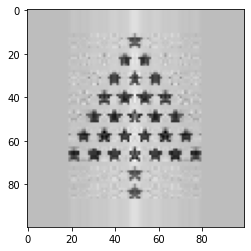

In [154]:
#Создание массивов Numpy на основе матриц счётов и весов
scores = np.genfromtxt('X_reduced.csv', delimiter=';')
loadings = np.genfromtxt('X_predictors.csv', delimiter=';')
#Найдем матрицу восстановленных данных как произведение матрицы счётов на транспонированную матрицу весов.
values = np.dot(scores,loadings.T)
values = np.dot(scores,loadings.T)
#Создание изображения
plt.imshow(values, cmap='Greys_r')